<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Necessary-Libraries" data-toc-modified-id="Import-Necessary-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Necessary Libraries</a></span></li><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Dataset</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></div>

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

2022-12-16 02:57:17.023552: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Dataset

In [2]:
apple_training_complete = pd.read_csv("AAPL.xls")

# Autocorrelation

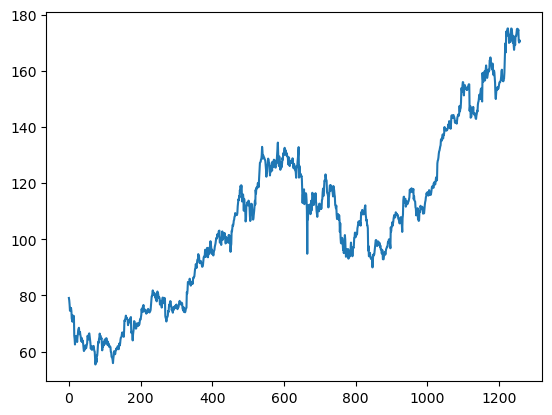

In [3]:
apple_training_complete['Open'].plot()
plt.show()

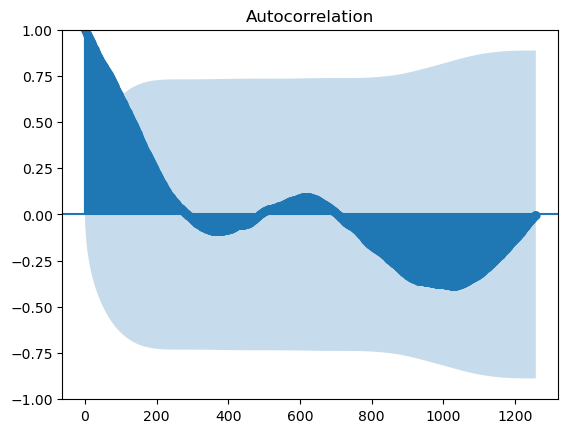

In [4]:
plot_acf(apple_training_complete['Open'], lags=1258)
plt.show()

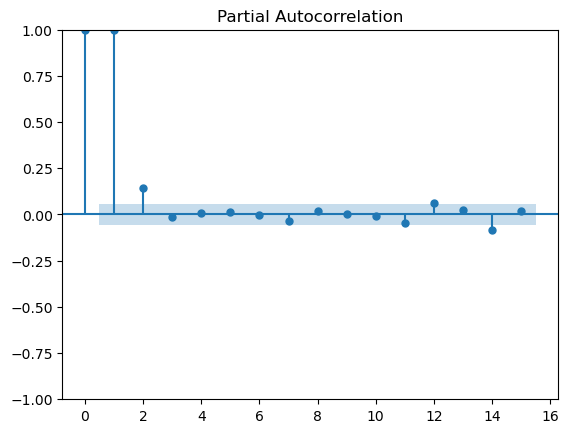

In [5]:
plot_pacf(apple_training_complete['Open'], lags = 15, method = "ols")
plt.show()

# Preprocessing

In [6]:
# Change data type into numpy array
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [7]:
apple_training_processed

array([[ 79.117142],
       [ 78.26857 ],
       [ 76.709999],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [8]:
# Normalization
scaler = MinMaxScaler(feature_range = (0, 1))
apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [35]:
apple_training_scaled.shape

(1259, 1)

In [9]:
apple_training_scaled

array([[0.19795893],
       [0.19086893],
       [0.17784673],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

In [10]:
apple_training_scaled.shape

(1259, 1)

In [11]:
# make feature (here we create 60 lag time in daily time frame)
features_set = []
labels = []
for i in range(60, 1259):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [12]:
type(features_set)

list

In [13]:
# convert list to numpy array
features_set, labels = np.array(features_set), np.array(labels)

In [14]:
features_set.shape

(1199, 60)

In [15]:
# reshape dataset
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [16]:
features_set.shape

(1199, 60, 1)

In [17]:
features_set.shape

(1199, 60, 1)

# Modeling

In [18]:
model = Sequential()

2022-12-16 02:57:33.417985: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-16 02:57:33.418357: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [19]:
model.add(LSTM(units=300, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [20]:
model.add(Dropout(0.2))

In [21]:
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=100))
model.add(Dropout(0.2))

In [22]:
model.add(Dense(units = 1))

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 300)           362400    
                                                                 
 dropout (Dropout)           (None, 60, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           160400    
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [42]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 50s 1s/step - loss: 0.0015
Epoch 2/100
38/38 [==============================] - 43s 1s/step - loss: 0.0017
Epoch 3/100
38/38 [==============================] - 47s 1s/step - loss: 0.0015
Epoch 4/100
38/38 [==============================] - 30s 789ms/step - loss: 0.0016
Epoch 5/100
38/38 [==============================] - 34s 899ms/step - loss: 0.0015
Epoch 6/100
38/38 [==============================] - 22s 573ms/step - loss: 0.0016
Epoch 7/100
38/38 [==============================] - 41s 1s/step - loss: 0.0017
Epoch 8/100
38/38 [==============================] - 29s 746ms/step - loss: 0.0016
Epoch 9/100
38/38 [==============================] - 27s 715ms/step - loss: 0.0015
Epoch 10/100
38/38 [==============================] - 35s 917ms/step - loss: 0.0020
Epoch 11/100
38/38 [==============================] - 29s 779ms/step - loss: 0.0017
Epoch 12/100
38/38 [==============================] - 38s 995ms/step - loss: 0.0013
Epoch 13/100


# Evaluate Model
## Make test dataset

In [43]:
apple_testing_complete = pd.read_csv("AAPL - Jan2018.xls")
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [44]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

In [45]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

/tmp/ipykernel_22260/3076019126.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values


In [46]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [47]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [48]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [49]:
test_features.shape

(20, 60, 1)

In [50]:
predictions = model.predict(test_features)

1/1 [==============================] - 0s 151ms/step


In [51]:
predictions.shape

(20, 1)

In [52]:
predictions = scaler.inverse_transform(predictions)

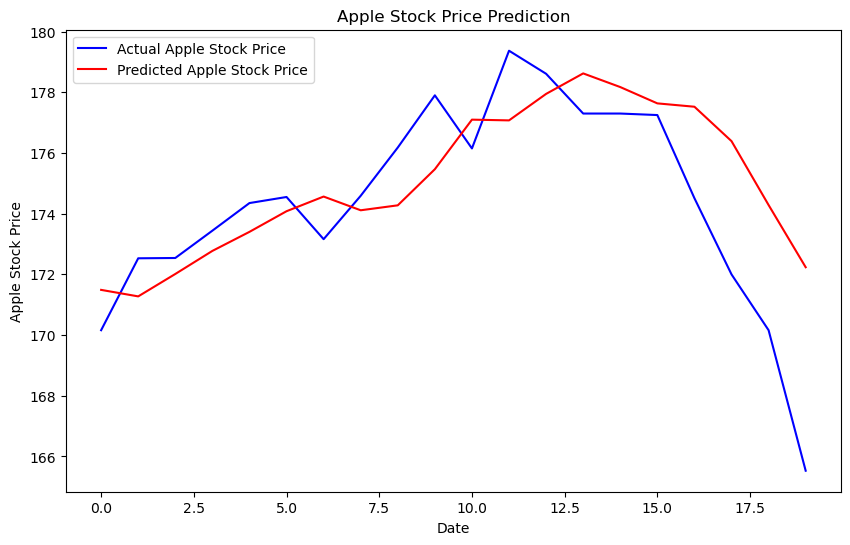

In [53]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# Load new data

In [63]:
eval_data_complete = pd.read_csv('AAPL-2021-2022.csv')
eval_data_processed = eval_data_complete.iloc[:, 1:2].values

In [65]:
eval_data_scaled = scaler.transform(eval_data_processed)

In [66]:
eval_feature = []
eval_label = []
for i in range(60, 253):
    eval_feature.append(eval_data_scaled[i-60:i, 0])
    eval_label.append(eval_data_scaled[i, 0])

In [67]:
eval_feature, eval_label = np.array(eval_feature), np.array(eval_label)

In [68]:
eval_feature.shape

(193, 60)

In [69]:
eval_feature = np.reshape(eval_feature, (eval_feature.shape[0], eval_feature.shape[1], 1))

In [70]:
eval_feature.shape

(193, 60, 1)

In [71]:
eval_predict = model.predict(eval_feature)

7/7 [==============================] - 1s 131ms/step


In [74]:
eval_predict = scaler.inverse_transform(eval_predict)

In [93]:
# eval_label = eval_label.reshape(-1, 1)
# eval_label = scaler.inverse_transform(eval_label)

actual_eval = eval_data_complete.iloc[60:, 1:2]


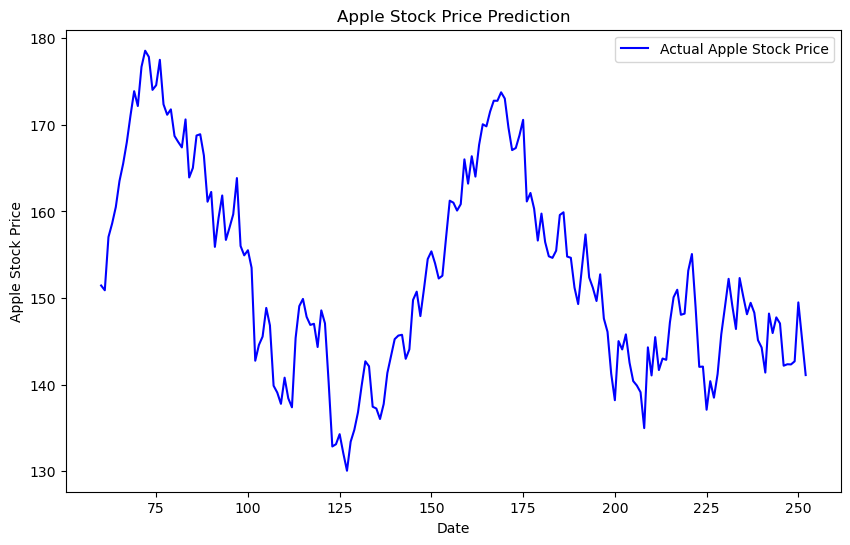

In [95]:
plt.figure(figsize=(10,6))
plt.plot(actual_eval, color='blue', label='Actual Apple Stock Price')
# plt.plot(eval_predict , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()